# Desafío 2 - Visualización

### Ezequiel Gonzalez Luriaud

#### Importación de librerías a utilizar

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del DataSet

In [4]:
studentsDF = pd.read_csv('../data/DS - Students.csv')

display(studentsDF.head(10))

display(studentsDF.columns)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

## Checkeo de Nulls y celdas en blanco

In [5]:
studentsDF.isnull().sum().sum()

0

In [6]:
np.where(studentsDF.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Vemos que no hay celdas con valores null o vacias.

## Visualizaciones

### Matplotlib

#### 1er Gráfico - Barras Course vs Approved 1st Sem

Course
1      123
2      468
3     1557
4     1651
5     1500
6     1998
7      882
8      805
9     2124
10    2285
11    1551
12    5759
13     585
14    1560
15    1974
16    1300
17    1619
Name: Curricular units 1st sem (enrolled), dtype: int64

Course
1       81
2      425
3     1170
4     1149
5     1265
6     1489
7      415
8      484
9     1432
10    1842
11    1135
12    4772
13     401
14    1137
15    1604
16     990
17    1031
Name: Curricular units 1st sem (approved), dtype: int64

Course
1     65.853659
2     90.811966
3     75.144509
4     69.594185
5     84.333333
6     74.524525
7     47.052154
8     60.124224
9     67.419962
10    80.612691
11    73.178594
12    82.861608
13    68.547009
14    72.884615
15    81.256332
16    76.153846
17    63.681285
dtype: float64

Text(0, 0.5, 'Porcentaje de aprobadas - 1er SEM')

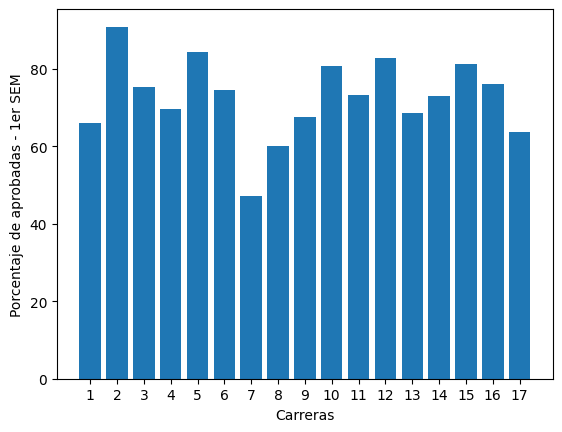

In [33]:
fig1, ax1 = plt.subplots()
# Calculamos la suma de materias aprobadas y materias anotadas en el 1er semestre según carrera.
enrolledByCourse = studentsDF.groupby(by=["Course"])["Curricular units 1st sem (enrolled)"].sum()
approvedByCourse = studentsDF.groupby(by=["Course"])["Curricular units 1st sem (approved)"].sum()

display(enrolledByCourse)
display(approvedByCourse)
# Calculamos la relación entre aprobadas/anotadas
approvedPercentageByCourse = (approvedByCourse/enrolledByCourse)*100
display(approvedPercentageByCourse)

#Graficamos 
ax1.set_xticks(approvedPercentageByCourse.index)
ax1.bar(approvedPercentageByCourse.index,approvedPercentageByCourse)
ax1.set_xlabel("Carreras")
ax1.set_ylabel("Porcentaje de aprobadas - 1er SEM")


Podemos ver que las carreras se mantienen bastante parejas en cuanto a porcentaje de aprobación (1er SEM), pero hay una notablemente baja: la 7. Se podría decir que los estudiantes de la carrera 7 tienen menos chance de aprobar las materias del 1er SEM. (falta investigar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Approved 2nd S')

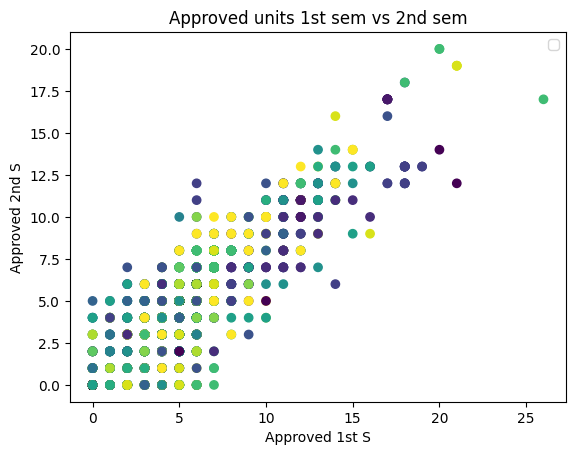

In [15]:
fig, ax = plt.subplots()
ax.scatter(studentsDF['Curricular units 1st sem (approved)'],studentsDF['Curricular units 2nd sem (approved)'],c=studentsDF['Course'])
ax.legend()
ax.set_title('Approved units 1st sem vs 2nd sem')
ax.set_xlabel('Approved 1st S')
ax.set_ylabel('Approved 2nd S')